<a href="https://colab.research.google.com/github/schmcklr/skill_extractor/blob/main/skill_extractor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Install dependencies & load input data



*   pyLDAvis (for visualization)
*   gensim (for LDA topic modeling)
*   spacy language model "de_core_news_sm" (for 
tokenization)
*   locale (for UTF-8 encoding)





In [4]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!pip install pyLDAvis
!pip install gensim
!python -m spacy download de_core_news_sm
from gensim import corpora, models
from gensim.utils import simple_preprocess
from gensim.models import Phrases
from gensim.models.phrases import Phrases, Phraser
import pandas as pd
from gensim.corpora import Dictionary
from gensim.corpora import Dictionary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-03-06 14:40:45.582347: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-06 14:40:46.794475: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-06 14:

1.1 Defining function for stopword removal 


*   uses nltk library




In [5]:
from nltk import word_tokenize, pos_tag, ne_chunk

# defining other stop words
other_stop_words = ['good', 'drive', 'part', 'time', 'develop', 'one', 'well', 'help', 'opportunities', 'execution',
                    'requirements', 'service',
                    'people', 'within', 'ability', 'projects', 'us', 'strong', 'environment', 'product', 'customer',
                    'project', 'company',
                    'services', 'solutions', 'knowledge', 'celonis', 'customers', 'new', 'working', 'support', 'skills',
                    'experience', 'work',
                    'operation', 'internship', 'partner', 'value', 'client', 'company', 'online', 'market', 'field',
                    'year', 'manager', 'also',
                    'office', 'responsible', 'internal', 'looking', 'training', 'responsibility', 'quality', 'job',
                    'department', 'task', 'professional',
                    'world', 'offer', 'change', 'group', 'employee', 'implementation', 'global', 'improvement', 'area',
                    'zalando', 'fashion', 'discount',
                    'model', 'year', 'future', 'take', 'organization', 'challenge', 'expert', 'operation', 'way',
                    'information', 'use', 'relevant', 'personal',
                    'best', 'stakeholder', 'study', 'analytical', 'digital', 'performance', 'engineering',
                    'operational', 'industry',
                    'control', 'various', 'sale', 'continuous', 'need', 'across', 'career', 'improve', 'financial',
                    'role', 'standard', 'area', 'high',
                    'different', 'key', 'user', 'operation', 'level', 'make', 'diverse', 'ensure', 'company',
                    'employee', 'task',
                    'preferably', 'detail', 'overall', 'context', 'bringing', 'request', 'candidate', 'grow', 'safety',
                    'shop',
                    'unicredit', 'station' 'amazon', 'represent', 'industry', 'ag', 'merit', 'nestlé', 'advise',
                    'review', 'applicant', 'term',
                    'gain', 'description', 'everyone', 'therefore', 'shopping', 'meet', 'truck', 'portfolio', 'fruit',
                    'everyone', 'therefore', 'shopping', 'meet', 'truck', 'fruit', 'coordinate', 'may', 'derive',
                    'line', 'ready', 'owner',
                    'several', 'participate', 'step', 'transport', 'many', 'plant', 'needed', 'germany', 'largest',
                    'commercial', 'initial',
                    'capacity', 'dare', 'trainee', 'highly', 'sexual', 'without', 'operating', 'making', 'accept',
                    'asset', 'kpmg', 'origin',
                    'celebrate', 'package', 'next', 'national', 'mentoring', 'providing', 'period', 'discount',
                    'housekeeping', 'yoga',
                    'management', 'bookkeeping', 'economy', 'vocabulary', 'billing', 'operation', 'finance', 'sale',
                    'consulting', 'sale', 'economics', 'offshoring', 'banking', 'logistics', 'empowerment', 'loan']



# removing stopwords from dataframe
def remove_stopwords(df_column):
    df_column = df_column.apply(lambda x: " ".join(x for x in x.split() if x not in other_stop_words))
    return df_column



# 2. Preprocessing data


*   filtering job advertisements for "bpm" or "process" in the job description
*  stopwords removing



2.1 Filtering and stopword removal




In [7]:
# preprocessing data
import pandas as pd

# user info
print('Loading job advertisement data...')

# fetching raw data (preprocessed data)
workbook = 'https://github.com/schmcklr/skill_analyser/blob/main/job_data/job_data_preprocessed.xlsx?raw=true'
# import of tabs
job_data = pd.read_excel(workbook, sheet_name="Sheet1")

# user info
print('Preprocessing job advertisements (' + str(len(job_data['description'])) + ')...')

# specifies job keywords
jobKeywords = ["bpm", "process"]

# filter dataframe by keywords in column 'description' (ignores case)
job_data = job_data[job_data['description'].str.contains('|'.join(jobKeywords), case=False)]

# TODO: currently not in use because currently only words which a related to a skill will be extracted,
# whole job description will be used
# job_data = extract_skill_section(job_data, "description")

# removing stopwords from dataframe
job_data['descriptionTokenized'] = remove_stopwords(job_data['descriptionTokenized'])

# copying the 'descriptionTokenized' column to also have the complete text
job_data['descriptionTokenizedComplete'] = job_data['descriptionTokenized']


def extract_skills(df_column):
    df_column = df_column.apply(lambda x: " ".join(x for x in x.split() if x in skills))
    return df_column

# using the with create_skill_list created dictionary to extract skills from job adds
#job_data['descriptionTokenized'] = extract_skills(job_data['descriptionTokenized'])


Loading job advertisement data...
Preprocessing job advertisements (2798)...


2.2 Connecting to API (emsicloud)




In [8]:
import requests
import pandas as pd
# requesting access token
url = "https://auth.emsicloud.com/connect/token"
payload = "client_id=lwtnyxiuohd90aqc&client_secret=ZqV4d9LQ&grant_type=client_credentials&scope=emsi_open"
headers = {'Content-Type': 'application/x-www-form-urlencoded'}
response = requests.request("POST", url, data=payload, headers=headers)
url = "https://emsiservices.com/skills/versions/latest/skills"

# storing access token
access_token = response.json()["access_token"]

# requesting skill list
querystring = {"fields": "name,type", "limit": "100000"}
headers = {'Authorization': 'Bearer ' + access_token}
response = requests.request("GET", url, headers=headers, params=querystring)
data = response.json()

# initialise skill array
skills = []
types = []

# add skills to the array
for entry in data["data"]:
    skills.append(entry["name"].lower())
# TODO: Remove just needed for developing purpose
# Convert the array to dataFrame
df = pd.DataFrame(skills, columns=['Skills'])

2.3 Creating skill list

*   Loading skills from API
*   Adding own skill terms

In [9]:
# creating own skill list
other_skills = ['python', 'c++', 'c', 'r', 'java', 'hadoop', 'scala', 'flask', 'pandas', 'spark', 'scikit-learn',
                'numpy', 'php', 'sql', 'mysql', 'css', 'mongdb', 'nltk', 'fastai', 'keras', 'pytorch', 'tensorflow',
                'linux', 'ruby', 'javascript', 'django', 'react', 'reactjs', 'ai', 'ui', 'tableau', 'crm', 'modeling',
                'bpm', 'vision', 'communication', 'analysis', 'design',
                'governance', 'police', 'simulation', 'automation', 'kpi', 'erp', 'statistic', 'bpmn']

# creating composed skills (needed for lemmatization that words considered as one word)
composite_skills = ['process_modeling', 'application_development', 'change_techniques', 'business_case',
                    'business_process_improvement']

gartner_skill_set = ['business_case', 'project_management', 'organizational', 'communication',
                     'change_management', 'process_discovery', 'process_modeling', 'governance',
                     'performance_management', 'methodology_toolbox',
                     'architecture', 'bpmn', 'bpm', 'agile_development', 'optimization', 'user_experience', 'ui'
                     ]

# TODO: remove

# extending skill list fetched from API
skills.extend(other_skills)
skills.extend(composite_skills)
skills.extend(gartner_skill_set)

# replace blanks so that skills of the gesnims model are recognized
skills = [phrase.replace(' ', '_') for phrase in skills]



2.4 Preprossesing

*   Tokenize documents
*   Remove numbers, but not words that contain numbers
*   Remove words that are only one character
*   Lemmatization
*   Compute bigrams, trigrams



In [10]:
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')
!pip install spacy
from matplotlib import pyplot as plt

# TODO: reactivate before go live
#from preprocessing.data_preprocessing import job_data


# user info
#print('Loading job advertisement data...')

# fetching raw data (preprocessed and filtered data)
#workbook = 'https://github.com/schmcklr/skill_analyser/blob/main/job_data/job_data_preprocessed_filtered.xlsx?raw=true'
# import of tabs
#job_data = pd.read_excel(workbook, sheet_name="Sheet1")


# user info
print('Analysing job advertisements (' + str(len(job_data['descriptionTokenized'])) + ')...')


docs = list(job_data['descriptionTokenizedComplete'])
print(len(docs))

# Tokenize the documents
from nltk.tokenize import RegexpTokenizer

# Split the documents into tokens
tokenizer = RegexpTokenizer(r'\w+')
for idx in range(len(docs)):
    docs[idx] = docs[idx].lower()  # Convert to lowercase.
    docs[idx] = tokenizer.tokenize(docs[idx])  # Split into words.

# Remove numbers, but not words that contain numbers
docs = [[token for token in doc if not token.isnumeric()] for doc in docs]

# Remove words that are only one character
docs = [[token for token in doc if len(token) > 1] for doc in docs]

# Lemmatize the documents
from nltk.stem.wordnet import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
docs = [[lemmatizer.lemmatize(token) for token in doc] for doc in docs]

# Compute bigrams
bigram = Phrases(docs, min_count=5)
# Compute trigrams
trigram = Phrases(bigram[docs], min_count=5)

# Going through the documents and adding bigrams and trigrams
for idx in range(len(docs)):
    for token in trigram[bigram[docs[idx]]]:
        if '_' in token:
            # If token is a bigram or trigram, add to document
            docs[idx].append(token)


# filter docs for tokens which are in skill list
filtered_docs = []
for doc in docs:
    # Split text into tokens
    tokens = doc
    # Keep only tokens that are included in the skills list (could take some time)
    new_tokens = [token.replace(' ', '_') for token in tokens if token.replace(' ', '_') in skills]
    # Convert new list of tokens into a string and add it to the new list of documents
    filtered_docs.append(new_tokens)

# Create a dictionary representation of the documents
#dictionary = Dictionary(docs)
dictionary = Dictionary(filtered_docs)

# Filter out words that occur less than 20 documents, or more than 50% of the documents
#dictionary.filter_extremes(no_below=5)


# Bag-of-words representation of the documents
corpus = [dictionary.doc2bow(doc) for doc in docs]

#print('Number of unique tokens: %d' % len(dictionary))
#print('Number of documents: %d' % len(corpus))


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Loading job advertisement data...
Analysing job advertisements (2791)...
2791


/usr/local/lib/python3.8/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


# 3. LDA model

3.1 Train LDA model (all data)

In [12]:
# Train LDA model.
!pip install gensim
from gensim.models import LdaModel

# Set training parameters.
num_topics = 10 # specifies the number of topics to be extracted from the corpus
chunksize = 2000 # sets the number of documents used in each chunk during training to avoid memory issues
passes = 20 # sets the number of training passes to improve the model accuracy
iterations = 400 #sets the maximum number of iterations during the inference process for each document, which determines the accuracy of the model

# Make an index to word dictionary.
temp = dictionary[0]  # used only to "load" the dictionary
id2word = dictionary.id2token

model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes
)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


3.2 Output of top topics and average coherence (all data)

In [13]:
top_topics = model.top_topics(corpus)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)

#from pprint import pprint
#pprint(top_topics)

Average topic coherence: -4.4963.


3.3 Output of topics and word frequencies (all data)

In [14]:
# Print the topics
for idx, topic in model.print_topics(-1):
    print(f'Topic: {idx} \nWords: {topic}\n')

# Extrahieren Sie die Häufigkeit jedes Tokens aus dem Corpus
token_frequencies = {}
for doc in corpus:
    for token_id, freq in doc:
        token = dictionary[token_id]
        if token in token_frequencies:
            token_frequencies[token] += freq
        else:
            token_frequencies[token] = freq

# Sortieren Sie die Token nach absteigender Häufigkeit
sorted_tokens = sorted(token_frequencies.items(), key=lambda x: x[1], reverse=True)

# Drucken Sie die Liste der Token und ihrer Häufigkeiten
for token, freq in sorted_tokens:
    if freq >= 1:
        print(token, freq)

Topic: 0 
Words: 0.181*"analytics" + 0.136*"automation" + 0.133*"planning" + 0.110*"visionary" + 0.087*"professionalism" + 0.035*"communication" + 0.030*"process_mining" + 0.029*"informatics" + 0.024*"mathematics" + 0.021*"design"

Topic: 1 
Words: 0.136*"governance" + 0.085*"communication" + 0.052*"planning" + 0.050*"collaboration" + 0.041*"construction" + 0.040*"analysis" + 0.032*"energetic" + 0.028*"data_governance" + 0.025*"analytics" + 0.025*"purchasing"

Topic: 2 
Words: 0.231*"marketing" + 0.139*"supply_chain" + 0.095*"research" + 0.052*"planning" + 0.046*"communication" + 0.039*"innovation" + 0.030*"chemistry" + 0.021*"collaboration" + 0.019*"analysis" + 0.017*"leadership"

Topic: 3 
Words: 0.129*"crm" + 0.125*"communication" + 0.103*"vision" + 0.080*"marketing" + 0.065*"outsourcing" + 0.044*"business_process_outsourcing" + 0.033*"supervision" + 0.018*"inquiry" + 0.017*"innovation" + 0.016*"organizational"

Topic: 4 
Words: 0.220*"design" + 0.085*"architecture" + 0.057*"innovat

3.4 Output word frequencies (token counted only once per doc, all data)

In [15]:
# Print the topics
#for idx, topic in model.print_topics(-1):
#    print(f'Topic: {idx} \nWords: {topic}\n')

# Extract the frequency of each token from the corpus
token_frequencies = {}
for doc in corpus:
    tokens_in_doc = set()
    for token_id, freq in doc:
        token = dictionary[token_id]
        if token not in tokens_in_doc:
            tokens_in_doc.add(token)
            if token in token_frequencies:
                token_frequencies[token] += 1
            else:
                token_frequencies[token] = 1



# Sort the tokens by descending frequency
sorted_tokens = sorted(token_frequencies.items(), key=lambda x: x[1], reverse=True)

# Print the list of tokens and their frequencies
for token, freq in sorted_tokens:
    if freq >= 1:
        print(token, freq)

communication 1678
analysis 992
design 952
planning 803
innovation 637
analytics 630
automation 593
research 494
collaboration 451
marketing 399
professionalism 395
visionary 379
leadership 378
optimization 374
sql 347
organizational 330
informatics 320
architecture 312
accounting 309
vision 253
creativity 225
mathematics 213
supply_chain 208
cooperation 206
governance 205
python 198
writing 185
erp 182
modeling 179
problem_solving 178
crm 176
software_development 171
java 164
coaching 159
computer_science 155
teamwork 151
business_intelligence 150
ai 147
procurement 142
outsourcing 140
digitization 139
business_administration 138
curiosity 135
salesforce 126
dashboard 125
reliability 105
javascript 104
visualization 98
accountability 97
business_process_outsourcing 96
process_mining 94
supervision 92
statistic 91
data_science 91
enthusiasm 90
construction 86
negotiation 86
purchasing 84
machine_learning 81
acting 78
big_data 76
remuneration 76
tableau 75
forecasting 75
advertisement 7

Group dataframes by year, store LDA models & token frequencies

In [16]:
# store lda_model, token frequencies for each year
lda_models = {}
token_freqs = {}
lda_model_overall = []
token_freqs_overall = []

# Add model to lda_model list
lda_model_overall = model
token_freqs_overall = sorted_tokens


# group the DataFrame by year
grouped = job_data.groupby(job_data['created_at'].dt.year)

# create a dictionary to store the new DataFrames
year_dfs = {}

# split the groups into separate DataFrames and store them in the dictionary
for year, group in grouped:
    year_dfs[year] = group.copy()


# Number of jobs ads per year
number_of_ads_per_year = {}
for year in year_dfs:
  number_of_ads_per_year[year] = len(year_dfs[year]['descriptionTokenizedComplete'])
print(number_of_ads_per_year)

{2015: 122, 2016: 38, 2017: 36, 2018: 245, 2019: 684, 2020: 726, 2021: 755, 2022: 185}


3.5 Train LDA model (divided by year)

2015
Loading job advertisement data...
122


/usr/local/lib/python3.8/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


Topic: 0 
Words: 0.110*"communication" + 0.099*"business_process" + 0.089*"negotiation" + 0.088*"planning" + 0.064*"collaboration" + 0.058*"marketing" + 0.027*"reliability" + 0.025*"enthusiasm" + 0.025*"budgeting" + 0.023*"analysis"

Topic: 1 
Words: 0.117*"communication" + 0.069*"business_process" + 0.062*"supervision" + 0.043*"problem_solving" + 0.035*"innovation" + 0.033*"resourcing" + 0.032*"collaboration" + 0.032*"geography" + 0.028*"design" + 0.026*"analysis"

Topic: 2 
Words: 0.124*"analysis" + 0.083*"business_process" + 0.082*"planning" + 0.059*"communication" + 0.042*"marketing" + 0.036*"supply_chain" + 0.034*"design" + 0.032*"procurement" + 0.029*"reliability" + 0.025*"microsoft_excel"

Topic: 3 
Words: 0.143*"architecture" + 0.099*"business_process" + 0.080*"communication" + 0.072*"leadership" + 0.054*"governance" + 0.049*"enterprise_architecture" + 0.048*"innovation" + 0.043*"collaboration" + 0.024*"reliability" + 0.024*"optimization"

Topic: 4 
Words: 0.127*"communication"

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


2016
Loading job advertisement data...
38


/usr/local/lib/python3.8/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: Depr

Topic: 0 
Words: 0.143*"analysis" + 0.133*"business_process" + 0.110*"communication" + 0.095*"design" + 0.044*"planning" + 0.037*"leadership" + 0.028*"organizational" + 0.028*"automation" + 0.023*"innovation" + 0.022*"collaboration"

Topic: 1 
Words: 0.139*"marketing" + 0.094*"communication" + 0.091*"analysis" + 0.077*"erp" + 0.073*"business_process" + 0.064*"design" + 0.031*"planning" + 0.026*"enthusiasm" + 0.026*"reinsurance" + 0.022*"advertisement"

Topic: 2 
Words: 0.116*"business_process" + 0.098*"nosql" + 0.075*"design" + 0.066*"advertisement" + 0.062*"sql" + 0.059*"communication" + 0.050*"parameter" + 0.035*"analytics" + 0.032*"curiosity" + 0.031*"analysis"

Topic: 3 
Words: 0.093*"business_process" + 0.074*"communication" + 0.064*"analysis" + 0.057*"design" + 0.039*"advertisement" + 0.030*"sql" + 0.030*"accountability" + 0.025*"planning" + 0.024*"analytics" + 0.023*"leadership"

Topic: 4 
Words: 0.110*"business_process" + 0.091*"optimization" + 0.082*"design" + 0.068*"advertise

/usr/local/lib/python3.8/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: Depr

Topic: 0 
Words: 0.155*"communication" + 0.078*"business_process" + 0.071*"planning" + 0.067*"innovation" + 0.064*"governance" + 0.037*"advertisement" + 0.036*"writing" + 0.035*"erp" + 0.033*"supply_chain" + 0.029*"optimization"

Topic: 1 
Words: 0.110*"planning" + 0.101*"communication" + 0.090*"business_process" + 0.071*"design" + 0.061*"leadership" + 0.045*"architecture" + 0.044*"innovation" + 0.040*"analysis" + 0.031*"governance" + 0.029*"computer_science"

Topic: 2 
Words: 0.100*"communication" + 0.097*"business_process" + 0.051*"analysis" + 0.041*"design" + 0.038*"planning" + 0.031*"innovation" + 0.029*"architecture" + 0.026*"governance" + 0.022*"advertisement" + 0.021*"computer_science"

Topic: 3 
Words: 0.214*"communication" + 0.093*"analysis" + 0.088*"business_process" + 0.050*"eurostar" + 0.050*"dashboard" + 0.048*"problem_solving" + 0.043*"computer_science" + 0.042*"erp" + 0.037*"planning" + 0.029*"vision"

Topic: 4 
Words: 0.118*"analysis" + 0.082*"analytics" + 0.081*"commun

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


2018
Loading job advertisement data...
245


Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sco

Topic: 0 
Words: 0.139*"design" + 0.098*"business_process" + 0.065*"communication" + 0.058*"research" + 0.051*"analysis" + 0.050*"marketing" + 0.030*"organizational" + 0.026*"automation" + 0.023*"collaboration" + 0.022*"remuneration"

Topic: 1 
Words: 0.090*"design" + 0.074*"cooperation" + 0.071*"business_process" + 0.070*"optimization" + 0.061*"communication" + 0.040*"digitization" + 0.037*"marketing" + 0.032*"planning" + 0.031*"analysis" + 0.027*"business_informatics"

Topic: 2 
Words: 0.076*"business_process" + 0.067*"communication" + 0.055*"design" + 0.049*"architecture" + 0.045*"marketing" + 0.040*"research" + 0.035*"automation" + 0.033*"watson_iot" + 0.031*"informatics" + 0.030*"innovation"

Topic: 3 
Words: 0.122*"business_process" + 0.071*"design" + 0.064*"artificial_intelligence" + 0.049*"communication" + 0.036*"informatics" + 0.036*"entrepreneurship" + 0.036*"empathy" + 0.029*"digitization" + 0.028*"innovation" + 0.023*"big_data"

Topic: 4 
Words: 0.273*"planning" + 0.078*"su

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


2019
Loading job advertisement data...
684


Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sco

Topic: 0 
Words: 0.159*"automation" + 0.055*"analytics" + 0.044*"design" + 0.039*"modeling" + 0.039*"analysis" + 0.034*"communication" + 0.031*"innovation" + 0.031*"cooperation" + 0.026*"robotics" + 0.025*"java"

Topic: 1 
Words: 0.183*"marketing" + 0.066*"accounting" + 0.059*"communication" + 0.050*"research" + 0.048*"informatics" + 0.037*"remuneration" + 0.027*"innovation" + 0.027*"design" + 0.023*"optimization" + 0.021*"construction"

Topic: 2 
Words: 0.180*"accounting" + 0.137*"planning" + 0.102*"communication" + 0.056*"analysis" + 0.030*"innovation" + 0.027*"research" + 0.026*"collaboration" + 0.024*"creativity" + 0.024*"organizational" + 0.018*"coordinating"

Topic: 3 
Words: 0.131*"communication" + 0.065*"procurement" + 0.056*"design" + 0.049*"cooperation" + 0.042*"optimization" + 0.041*"digitization" + 0.032*"analysis" + 0.032*"automation" + 0.028*"organizational" + 0.026*"outsourcing"

Topic: 4 
Words: 0.140*"innovation" + 0.080*"communication" + 0.047*"creativity" + 0.047*"co

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


2020
Loading job advertisement data...
726


Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sco

Topic: 0 
Words: 0.186*"vision" + 0.065*"procurement" + 0.058*"communication" + 0.051*"visionary" + 0.049*"professionalism" + 0.039*"design" + 0.037*"netsuite" + 0.023*"planning" + 0.022*"marketing" + 0.020*"organizational"

Topic: 1 
Words: 0.087*"communication" + 0.078*"leadership" + 0.064*"analysis" + 0.061*"salesforce" + 0.060*"optimization" + 0.056*"digitization" + 0.050*"organizational" + 0.038*"informatics" + 0.028*"design" + 0.028*"planning"

Topic: 2 
Words: 0.145*"visionary" + 0.122*"professionalism" + 0.062*"process_mining" + 0.057*"analytics" + 0.056*"communication" + 0.049*"governance" + 0.047*"informatics" + 0.031*"planning" + 0.031*"mathematics" + 0.030*"automation"

Topic: 3 
Words: 0.106*"communication" + 0.058*"innovation" + 0.050*"cooperation" + 0.042*"supply_chain" + 0.041*"planning" + 0.039*"negotiation" + 0.036*"construction" + 0.029*"procurement" + 0.029*"accounting" + 0.028*"analysis"

Topic: 4 
Words: 0.132*"architecture" + 0.070*"innovation" + 0.056*"design" +

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


2021
Loading job advertisement data...
755


Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sco

Topic: 0 
Words: 0.056*"devops" + 0.055*"modeling" + 0.046*"cooperation" + 0.044*"communication" + 0.039*"process_modeling" + 0.038*"advising" + 0.036*"innovation" + 0.034*"negotiation" + 0.034*"analysis" + 0.028*"organizational"

Topic: 1 
Words: 0.112*"analytics" + 0.077*"planning" + 0.072*"analysis" + 0.066*"sql" + 0.052*"python" + 0.028*"dashboard" + 0.025*"automation" + 0.022*"ai" + 0.020*"machine_learning" + 0.019*"mathematics"

Topic: 2 
Words: 0.064*"communication" + 0.053*"design" + 0.053*"architecture" + 0.036*"invoicing" + 0.036*"merchandising" + 0.033*"innovation" + 0.029*"analysis" + 0.028*"sql" + 0.026*"kubernetes" + 0.021*"java"

Topic: 3 
Words: 0.057*"outsourcing" + 0.054*"linux" + 0.049*"settlement" + 0.039*"communication" + 0.032*"python" + 0.030*"curiosity" + 0.030*"reconciliation" + 0.026*"design" + 0.025*"reliability" + 0.025*"accounting"

Topic: 4 
Words: 0.097*"supply_chain" + 0.076*"communication" + 0.071*"analysis" + 0.058*"erp" + 0.053*"design" + 0.046*"optim

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


2022
Loading job advertisement data...
185


Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sco

Topic: 0 
Words: 0.130*"design" + 0.082*"analysis" + 0.076*"business_process" + 0.053*"communication" + 0.050*"innovation" + 0.040*"collaboration" + 0.030*"optimization" + 0.027*"ai" + 0.025*"supply_chain" + 0.025*"blockchain"

Topic: 1 
Words: 0.228*"automation" + 0.077*"marketing" + 0.073*"business_process" + 0.057*"communication" + 0.043*"coaching" + 0.034*"innovation" + 0.027*"software_development" + 0.023*"sql" + 0.022*"design" + 0.022*"analysis"

Topic: 2 
Words: 0.118*"salesforce" + 0.099*"business_process" + 0.094*"crm" + 0.065*"design" + 0.046*"communication" + 0.024*"analytics" + 0.023*"planning" + 0.019*"architecture" + 0.019*"javascript" + 0.017*"modeling"

Topic: 3 
Words: 0.140*"analytics" + 0.069*"business_process" + 0.067*"analysis" + 0.065*"sql" + 0.051*"business_intelligence" + 0.044*"communication" + 0.034*"python" + 0.026*"automation" + 0.024*"dashboard" + 0.024*"big_data"

Topic: 4 
Words: 0.143*"communication" + 0.120*"merchandising" + 0.057*"creativity" + 0.056*"

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


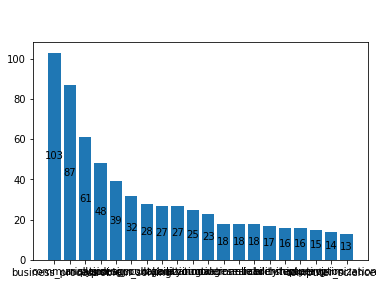

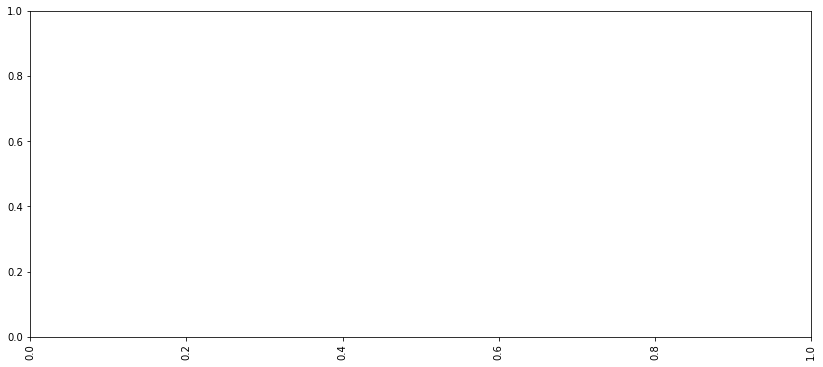

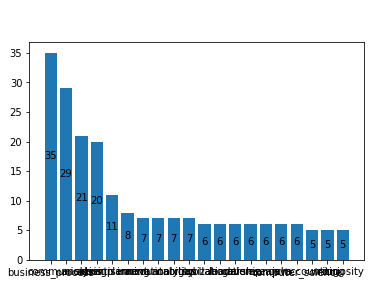

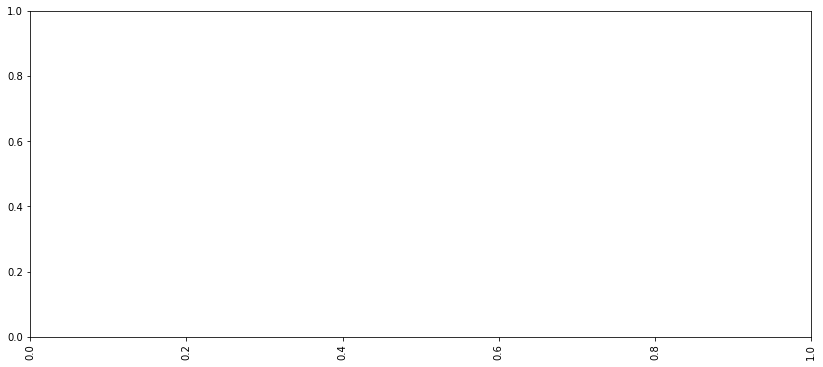

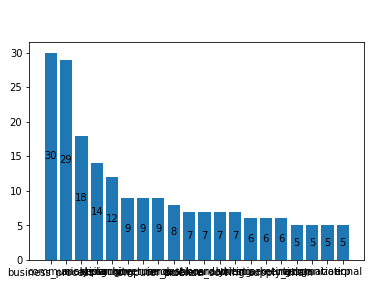

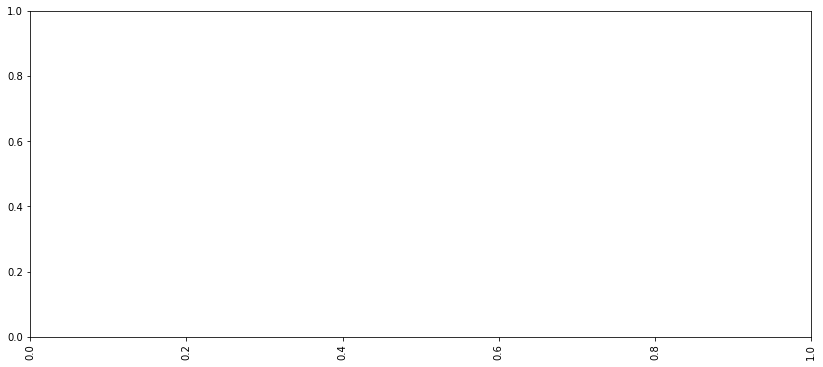

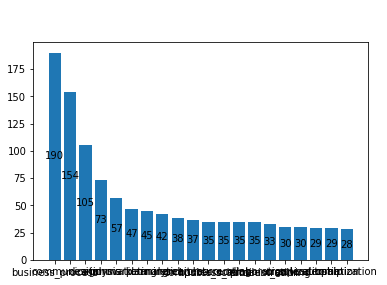

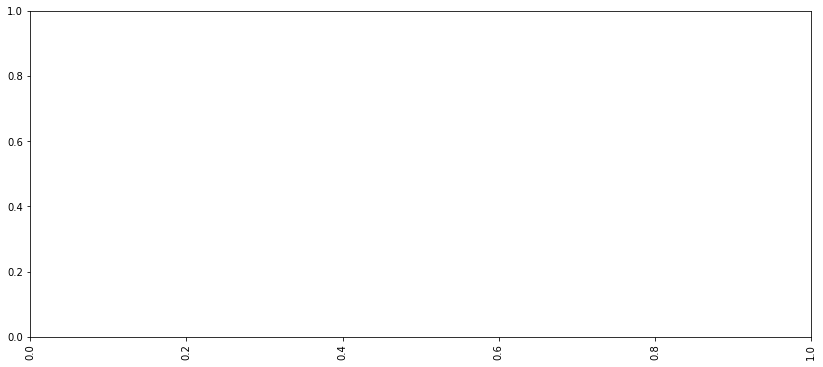

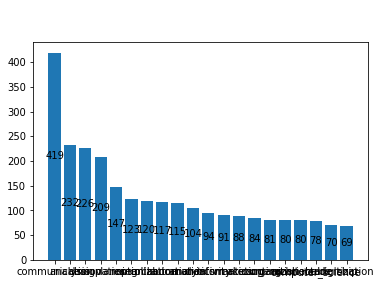

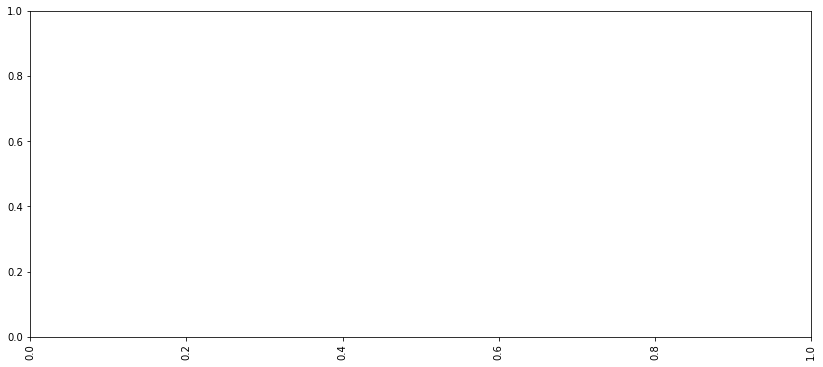

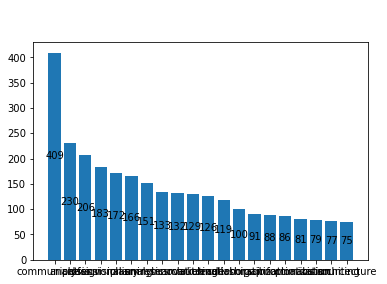

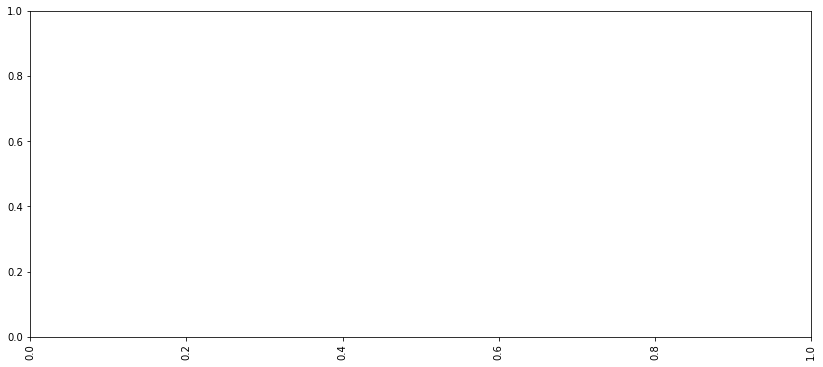

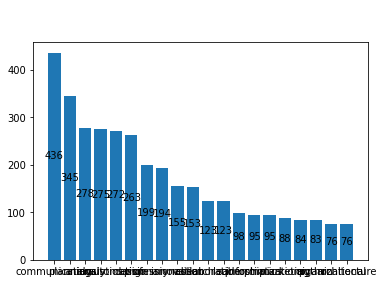

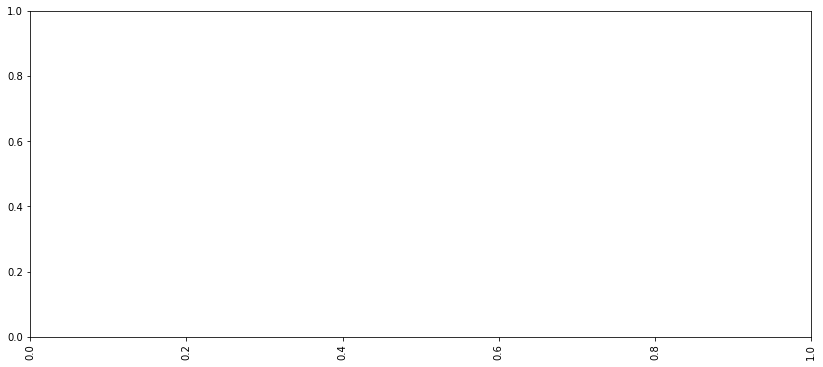

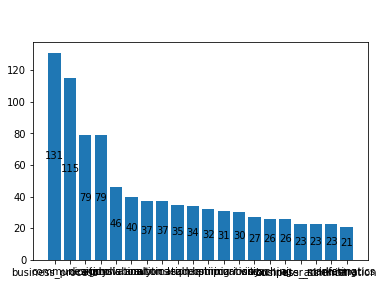

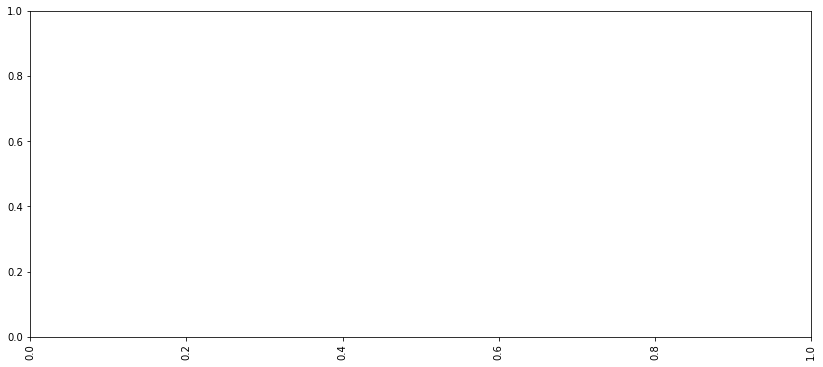

In [17]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from gensim.models import LdaModel

# analysis based on year
for year in year_dfs:
  print(year)

  # user info
  print('Loading job advertisement data...')

  # fetching raw data (preprocessed and filtered data)
  #workbook = 'https://github.com/schmcklr/skill_analyser/blob/main/job_data/job_data_preprocessed_filtered.xlsx?raw=true'
  # import of tabs
  #job_data = pd.read_excel(workbook, sheet_name="Sheet1")

  docs = list(year_dfs[year]['descriptionTokenizedComplete'])
  print(len(docs))

  # Tokenize the documents
  from nltk.tokenize import RegexpTokenizer

  # Split the documents into tokens
  tokenizer = RegexpTokenizer(r'\w+')
  for idx in range(len(docs)):
      docs[idx] = docs[idx].lower()  # Convert to lowercase.
      docs[idx] = tokenizer.tokenize(docs[idx])  # Split into words.

  # Remove numbers, but not words that contain numbers
  docs = [[token for token in doc if not token.isnumeric()] for doc in docs]

  # Remove words that are only one character
  docs = [[token for token in doc if len(token) > 1] for doc in docs]


  # Lemmatize the documents
  from nltk.stem.wordnet import WordNetLemmatizer

  lemmatizer = WordNetLemmatizer()
  docs = [[lemmatizer.lemmatize(token) for token in doc] for doc in docs]

  # Compute bigrams
  bigram = Phrases(docs, min_count=5)
  # Compute trigrams
  trigram = Phrases(bigram[docs], min_count=5)

  # Going through the documents and adding bigrams and trigrams
  for idx in range(len(docs)):
      for token in trigram[bigram[docs[idx]]]:
          if '_' in token:
              # If token is a bigram or trigram, add to document
              docs[idx].append(token)


  # filter docs for tokens which are in skill list
  filtered_docs = []
  for doc in docs:
      # Split text into tokens
      tokens = doc
      # Keep only tokens that are included in the skills list (could take some time)
      new_tokens = [token.replace(' ', '_') for token in tokens if token.replace(' ', '_') in skills]
      # Convert new list of tokens into a string and add it to the new list of documents
      filtered_docs.append(new_tokens)

  # Create a dictionary representation of the documents
  #dictionary = Dictionary(docs)
  dictionary = Dictionary(filtered_docs)

  # Filter out words that occur less than 20 documents, or more than 50% of the documents
  #dictionary.filter_extremes(no_below=5)


  # Bag-of-words representation of the documents
  corpus = [dictionary.doc2bow(doc) for doc in docs]

  #print('Number of unique tokens: %d' % len(dictionary))
  #print('Number of documents: %d' % len(corpus))


  # Train LDA model.
  # Set training parameters.
  num_topics = 10 # specifies the number of topics to be extracted from the corpus
  chunksize = 2000 # sets the number of documents used in each chunk during training to avoid memory issues
  passes = 20 # sets the number of training passes to improve the model accuracy
  iterations = 400 #sets the maximum number of iterations during the inference process for each document, which determines the accuracy of the model

  # Make an index to word dictionary.
  temp = dictionary[0]  # used only to "load" the dictionary
  id2word = dictionary.id2token

  model = LdaModel(
      corpus=corpus,
      id2word=id2word,
      chunksize=chunksize,
      alpha='auto',
      eta='auto',
      iterations=iterations,
      num_topics=num_topics,
      passes=passes
  )

  # Print the topics
  for idx, topic in model.print_topics(-1):
      print(f'Topic: {idx} \nWords: {topic}\n')


  # Extract the frequency of each token from the corpus (only counted once per doc)
  token_frequencies = {}
  for doc in corpus:
      tokens_in_doc = set()
      for token_id, freq in doc:
          token = dictionary[token_id]
          if token not in tokens_in_doc:
              tokens_in_doc.add(token)
              if token in token_frequencies:
                  token_frequencies[token] += 1
              else:
                  token_frequencies[token] = 1



  # Sort the tokens by descending frequency
  sorted_tokens = sorted(token_frequencies.items(), key=lambda x: x[1], reverse=True)

  # Print the list of tokens and their frequencies
  for token, freq in sorted_tokens:
      if freq >= 1:
          print(token, freq)


  

  # Add model to lda_model list

  lda_models[year] = model
  token_freqs[year] = sorted_tokens

  

  #############VISUALIZATION#####################        
  import pyLDAvis
  import pyLDAvis.gensim_models

  # function which allows visualization of topic modeling
  def visualization_with_vis(lda_model, corpus, dictionary, name):
      vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
      import webbrowser
      pyLDAvis.save_html(vis, str(name) + '.html')
      webbrowser.open('lda_visualization.html')


  visualization_with_vis(model, corpus, dictionary, year)


  # visualization of frequencies

  from matplotlib import pyplot as plt

  words = []
  frequency = []
  # create array of frequencies
  for token, freq in sorted_tokens:
      if freq >= 1:
        words.append(token)
        frequency.append(freq)


  fig, ax = plt.subplots()
  fig = plt.figure(figsize=(14,6))
  rects = ax.bar(words[:20], frequency[:20])
  plt.xticks(rotation=90)
  for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height / 2,
                f'{height:.0f}', ha='center', va='center')

    ax.set_title(str(year) + ": " + str(len(year_dfs[year]['descriptionTokenizedComplete'])) + " analyzed Job Advertisements", fontsize=16, fontweight='bold', color='white', y=1.08)



Prepare data for plotting

In [18]:
most_mentioned_skills = []
for token, freq in token_freqs_overall:
  most_mentioned_skills.append(token)

most_mentioned_skills_per_year = {}

print(token_freqs)
for skill in most_mentioned_skills:
  for year in token_freqs:
    value = 0
    for term, count in token_freqs[year]:
      if term == skill:
        value = count/number_of_ads_per_year[year]
        break
    if skill in most_mentioned_skills_per_year:
      most_mentioned_skills_per_year[skill].append(value)
    else:
      most_mentioned_skills_per_year[skill] = []
      most_mentioned_skills_per_year[skill].append(value)

print(most_mentioned_skills_per_year) 

{2015: [('business_process', 103), ('communication', 87), ('analysis', 61), ('planning', 48), ('design', 39), ('problem_solving', 32), ('accountability', 28), ('collaboration', 27), ('organizational', 27), ('accounting', 25), ('innovation', 23), ('governance', 18), ('research', 18), ('reliability', 18), ('leadership', 17), ('architecture', 16), ('marketing', 16), ('supervision', 15), ('computer_science', 14), ('optimization', 13), ('writing', 13), ('negotiation', 12), ('construction', 11), ('firefox', 11), ('coordinating', 11), ('sql', 10), ('professionalism', 9), ('resourcing', 9), ('modeling', 9), ('dashboard', 8), ('proactivity', 8), ('reconciliation', 8), ('roofing', 7), ('analytics', 7), ('erp', 7), ('outsourcing', 7), ('geography', 7), ('adaptability', 7), ('enthusiasm', 7), ('numeracy', 7), ('economy', 6), ('supply_chain', 6), ('crm', 6), ('acting', 6), ('investigation', 6), ('settlement', 6), ('software_development', 6), ('functional_specification', 6), ('microsoft_excel', 6), 

<Figure size 1008x432 with 0 Axes>

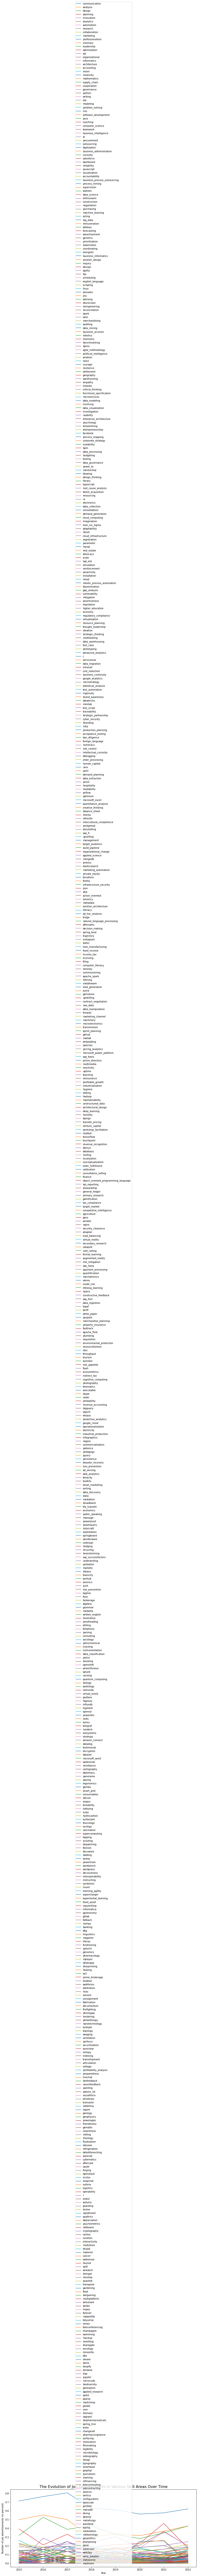

In [19]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.ticker import FormatStrFormatter


# Daten für den Plot
fig = plt.figure(figsize=(14,6))
fig, ax = plt.subplots(figsize=(14,6))
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%d'))

years = np.array(list(token_freqs.keys()))



# Plot erstellen
for skill in most_mentioned_skills_per_year:
  plt.plot(years, np.array(most_mentioned_skills_per_year[skill]), label=skill)

ticks = years
ax.set_xticks(ticks)

# Achsen beschriften
plt.xlabel("Year")
plt.ylabel("Number of job advertisements (in percent)")

# Titel hinzufügen
plt.title("The Evolution of Job Requirements in Various Skill Areas Over Time", fontsize=16)
# Legende hinzufügen
plt.legend()

# Plot anzeigen
plt.show()


In [39]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display
from matplotlib.ticker import FormatStrFormatter


years = np.array(list(token_freqs.keys()))


# Checkbox-Liste für die Skills erstellen
skills_list = list(most_mentioned_skills_per_year.keys())
skills_checkboxes = widgets.SelectMultiple(
    options=skills_list,
    value=[skills_list[0]],  # Standardwert für die Ausgangsauswahl
    rows=10,
    description='Skills:',
    disabled=False,
    layout=widgets.Layout(height='200px')
)



# Plotfunktion erstellen
def plot_skills(skills):
    plt.clf() # alten Plot löschen

    fig = plt.figure(figsize=(14,6))
    fig, ax = plt.subplots(figsize=(14,6))
    plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%d'))

    
    for skill in skills:
        plt.plot(years, np.array(most_mentioned_skills_per_year[skill]), label=skill)

    ticks = years
    ax.set_xticks(ticks)

    # Achsen beschriften
    plt.xlabel("Year")
    plt.ylabel("Number of job advertisements (in percent)")

    # Titel hinzufügen
    plt.title("The Evolution of Job Requirements in Various Skill Areas Over Time", fontsize=16)

    # Legende hinzufügen
    plt.legend()
    plt.show()


# Checkbox-Liste mit Plotfunktion verknüpfen
widgets.interactive(plot_skills, skills=skills_checkboxes)



interactive(children=(SelectMultiple(description='Skills:', index=(0,), layout=Layout(height='200px'), options…

In [2]:
!pip install mpldatacursor
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display
from matplotlib.ticker import FormatStrFormatter
from mpldatacursor import datacursor


years = np.array(list(token_freqs.keys()))


# Checkbox-Liste für die Skills erstellen
most_mentioned_skills_per_year = {k: v for k, v in most_mentioned_skills_per_year.items() if any(x > 0.05 for x in v)}
skills_list = list(most_mentioned_skills_per_year.keys())
skills_checkboxes = widgets.SelectMultiple(
    options=skills_list,
    value=[skills_list[0]],  # Standardwert für die Ausgangsauswahl
    rows=10,
    description='Skills:',
    disabled=False,
    layout=widgets.Layout(height='200px')
)




# Plotfunktion erstellen
def plot_skills(skills):
    plt.clf() # alten Plot löschen

    fig = plt.figure(figsize=(14,6))
    fig, ax = plt.subplots(figsize=(14,6))
    plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%d'))

    
    for skill in skills:
        plt.plot(years, np.array(most_mentioned_skills_per_year[skill]), label=skill, marker='o', markersize=5)
        datacursor(formatter='{y:.2f}'.format, hover=True)

        text = 'In an average of ' + str(round(most_mentioned_skills_per_year[skill].mean() * 100, 1)) + ' % of job ads'
        plt.text(text)

        

    # Y-Achse einstellen
    #ax.set_ylim([0, 1])
    #ax.set_yticks(np.arange(0, 1.2, 0.2))

    ticks = years
    ax.set_xticks(ticks)

    # Achsen beschriften
    plt.xlabel("Year")
    plt.ylabel("Number of job advertisements (in percent)")

    # Titel hinzufügen
    plt.title("The Evolution of Job Requirements in Various Skill Areas Over Time", fontsize=16)



    # Legende hinzufügen
    plt.legend()
    plt.show()


# Checkbox-Liste mit Plotfunktion verknüpfen
widgets.interactive(plot_skills, skills=skills_checkboxes)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


NameError: ignored

In [47]:
!pip install mplcursors
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display
import mplcursors
from matplotlib.ticker import FormatStrFormatter


years = np.array(list(token_freqs.keys()))


# Checkbox-Liste für die Skills erstellen
skills_list = list(most_mentioned_skills_per_year.keys())
skills_checkboxes = widgets.SelectMultiple(
    options=skills_list,
    value=[skills_list[0]],  # Standardwert für die Ausgangsauswahl
    rows=len(skills_list),
    description='Skills:',
    disabled=False
)


# Plotfunktion erstellen
def plot_skills(skills):
    plt.clf() # alten Plot löschen

    fig = plt.figure(figsize=(14,6))
    fig, ax = plt.subplots(figsize=(14,6))
    plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%d'))

    for skill in skills:
        # Punkte auf der Linie plotten
        points = plt.plot(years, np.array(most_mentioned_skills_per_year[skill]), label=skill, marker='o', markersize=6)

        # Tooltips für die Punkte hinzufügen
        mplcursors.cursor(points).connect(
            "add", lambda sel: sel.annotation.set_text(f"{sel.artist.get_label()}: {sel.target[1]:.2f}%")
        )

    ticks = years
    ax.set_xticks(ticks)

    # Achsen beschriften
    plt.xlabel("Year")
    plt.ylabel("Number of job advertisements (in percent)")

    # Titel hinzufügen
    plt.title("The Evolution of Job Requirements in Various Skill Areas Over Time", fontsize=16)

    # Legende hinzufügen
    plt.legend()
    plt.show()


# Checkbox-Liste mit Plotfunktion verknüpfen
widgets.interactive(plot_skills, skills=skills_checkboxes)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.0/89.0 KB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mplcursors: filename=mplcursors-0.5.2-py3-none-any.whl size=21069 sha256=3a5bfb7a8a99544844f897abd89461dabcf55a77b645435e09c4fda790a73841
  Stored in directory: /root/.cache/pip/wheels/6d/02/b1/7d5c397daf88f75d3432168edddd8b02d3ae2c050ffa7ca26f
Successfully built mplcursors


interactive(children=(SelectMultiple(description='Skills:', index=(0,), options=('communication', 'analysis', …

{2015: [('business_process', 103), ('communication', 87), ('analysis', 61), ('planning', 48), ('design', 39), ('problem_solving', 32), ('accountability', 28), ('collaboration', 27), ('organizational', 27), ('accounting', 25), ('innovation', 23), ('governance', 18), ('research', 18), ('reliability', 18), ('leadership', 17), ('architecture', 16), ('marketing', 16), ('supervision', 15), ('computer_science', 14), ('optimization', 13), ('writing', 13), ('negotiation', 12), ('construction', 11), ('firefox', 11), ('coordinating', 11), ('sql', 10), ('professionalism', 9), ('resourcing', 9), ('modeling', 9), ('dashboard', 8), ('proactivity', 8), ('reconciliation', 8), ('roofing', 7), ('analytics', 7), ('erp', 7), ('outsourcing', 7), ('geography', 7), ('adaptability', 7), ('enthusiasm', 7), ('numeracy', 7), ('economy', 6), ('supply_chain', 6), ('crm', 6), ('acting', 6), ('investigation', 6), ('settlement', 6), ('software_development', 6), ('functional_specification', 6), ('microsoft_excel', 6), 

<Figure size 1008x432 with 0 Axes>

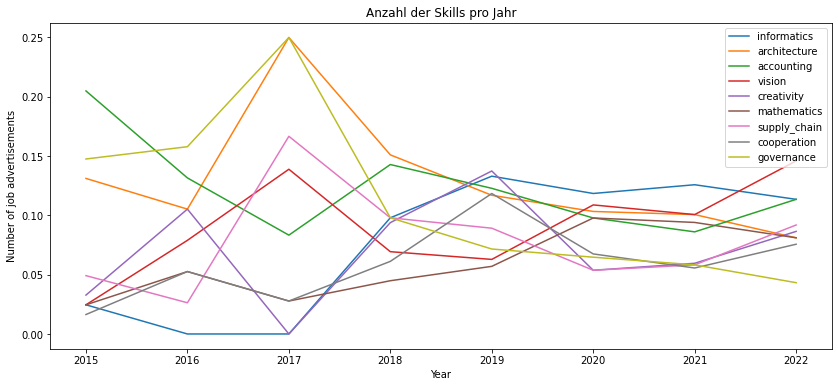

In [125]:
most_mentioned_skills = []
for token, freq in token_freqs_overall[16:25]:
  most_mentioned_skills.append(token)

most_mentioned_skills_per_year = {}

print(token_freqs)
for skill in most_mentioned_skills:
  for year in token_freqs:
    value = 0
    for term, count in token_freqs[year]:
      if term == skill:
        value = count/number_of_ads_per_year[year]
        break
    if skill in most_mentioned_skills_per_year:
      most_mentioned_skills_per_year[skill].append(value)
    else:
      most_mentioned_skills_per_year[skill] = []
      most_mentioned_skills_per_year[skill].append(value)

print(most_mentioned_skills_per_year) 

import matplotlib.pyplot as plt
import numpy as np

from matplotlib.ticker import FormatStrFormatter


# Daten für den Plot
fig = plt.figure(figsize=(14,6))
fig, ax = plt.subplots(figsize=(14,6))
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%d'))

years = np.array(list(token_freqs.keys()))



# Plot erstellen
for skill in most_mentioned_skills_per_year:
  plt.plot(years, np.array(most_mentioned_skills_per_year[skill]), label=skill)

ticks = years
ax.set_xticks(ticks)

# Achsen beschriften
plt.xlabel("Year")
plt.ylabel("Number of job advertisements")

# Titel hinzufügen
plt.title("Anzahl der Skills pro Jahr")

# Legende hinzufügen
plt.legend()

# Plot anzeigen
plt.show()




{2015: [('business_process', 103), ('communication', 87), ('analysis', 61), ('planning', 48), ('design', 39), ('problem_solving', 32), ('accountability', 28), ('collaboration', 27), ('organizational', 27), ('accounting', 25), ('innovation', 23), ('governance', 18), ('research', 18), ('reliability', 18), ('leadership', 17), ('architecture', 16), ('marketing', 16), ('supervision', 15), ('computer_science', 14), ('optimization', 13), ('writing', 13), ('negotiation', 12), ('construction', 11), ('firefox', 11), ('coordinating', 11), ('sql', 10), ('professionalism', 9), ('resourcing', 9), ('modeling', 9), ('dashboard', 8), ('proactivity', 8), ('reconciliation', 8), ('roofing', 7), ('analytics', 7), ('erp', 7), ('outsourcing', 7), ('geography', 7), ('adaptability', 7), ('enthusiasm', 7), ('numeracy', 7), ('economy', 6), ('supply_chain', 6), ('crm', 6), ('acting', 6), ('investigation', 6), ('settlement', 6), ('software_development', 6), ('functional_specification', 6), ('microsoft_excel', 6), 

<Figure size 1008x432 with 0 Axes>

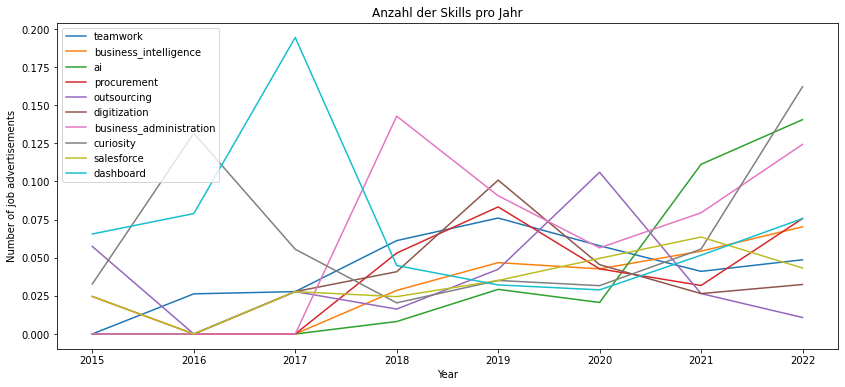

In [116]:
most_mentioned_skills = []
for token, freq in token_freqs_overall[35:45]:
  most_mentioned_skills.append(token)

most_mentioned_skills_per_year = {}

print(token_freqs)
for skill in most_mentioned_skills:
  for year in token_freqs:
    value = 0
    for term, count in token_freqs[year]:
      if term == skill:
        value = count/number_of_ads_per_year[year]
        break
    if skill in most_mentioned_skills_per_year:
      most_mentioned_skills_per_year[skill].append(value)
    else:
      most_mentioned_skills_per_year[skill] = []
      most_mentioned_skills_per_year[skill].append(value)

print(most_mentioned_skills_per_year) 

import matplotlib.pyplot as plt
import numpy as np

from matplotlib.ticker import FormatStrFormatter


# Daten für den Plot
fig = plt.figure(figsize=(14,6))
fig, ax = plt.subplots(figsize=(14,6))
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%d'))

years = np.array(list(token_freqs.keys()))



# Plot erstellen
for skill in most_mentioned_skills_per_year:
  plt.plot(years, np.array(most_mentioned_skills_per_year[skill]), label=skill)

ticks = years
ax.set_xticks(ticks)

# Achsen beschriften
plt.xlabel("Year")
plt.ylabel("Number of job advertisements")

# Titel hinzufügen
plt.title("Anzahl der Skills pro Jahr")

# Legende hinzufügen
plt.legend()

# Plot anzeigen
plt.show()



Keep only values which differs more than 30%

{2015: [('business_process', 103), ('communication', 87), ('analysis', 61), ('planning', 48), ('design', 39), ('problem_solving', 32), ('accountability', 28), ('collaboration', 27), ('organizational', 27), ('accounting', 25), ('innovation', 23), ('governance', 18), ('research', 18), ('reliability', 18), ('leadership', 17), ('architecture', 16), ('marketing', 16), ('supervision', 15), ('computer_science', 14), ('optimization', 13), ('writing', 13), ('negotiation', 12), ('construction', 11), ('firefox', 11), ('coordinating', 11), ('sql', 10), ('professionalism', 9), ('resourcing', 9), ('modeling', 9), ('dashboard', 8), ('proactivity', 8), ('reconciliation', 8), ('roofing', 7), ('analytics', 7), ('erp', 7), ('outsourcing', 7), ('geography', 7), ('adaptability', 7), ('enthusiasm', 7), ('numeracy', 7), ('economy', 6), ('supply_chain', 6), ('crm', 6), ('acting', 6), ('investigation', 6), ('settlement', 6), ('software_development', 6), ('functional_specification', 6), ('microsoft_excel', 6), 

<Figure size 1008x432 with 0 Axes>

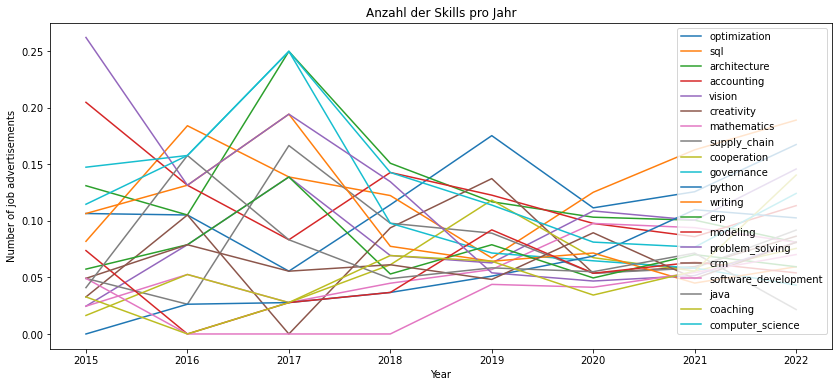

In [43]:
most_mentioned_skills = []
for token, freq in token_freqs_overall:
  most_mentioned_skills.append(token)

most_mentioned_skills_per_year = {}

print(token_freqs)
for skill in most_mentioned_skills:
  for year in token_freqs:
    value = 0
    for term, count in token_freqs[year]:
      if term == skill:
        value = count/number_of_ads_per_year[year]
        break
    if skill in most_mentioned_skills_per_year:
      most_mentioned_skills_per_year[skill].append(value)
    else:
      most_mentioned_skills_per_year[skill] = []
      most_mentioned_skills_per_year[skill].append(value)

import numpy as np

filtered_dict = {}
for key, values in most_mentioned_skills_per_year.items():
    if np.ptp(values[:4]) >= 0.3 * np.mean(values[:4]) and np.ptp(values[-4:]) >= 0.3 * np.mean(values[-4:]):
        filtered_dict[key] = values


most_mentioned_skills_per_year_filtered = filtered_dict

most_mentioned_skills_per_year_filtered = dict(list(most_mentioned_skills_per_year_filtered.items())[10:30])
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.ticker import FormatStrFormatter

# Daten für den Plot
fig = plt.figure(figsize=(14,6))
fig, ax = plt.subplots(figsize=(14,6))
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%d'))

years = np.array(list(token_freqs.keys()))



# Plot erstellen
for skill in most_mentioned_skills_per_year_filtered:
  plt.plot(years, np.array(most_mentioned_skills_per_year_filtered[skill]), label=skill)

ticks = years
ax.set_xticks(ticks)

# Achsen beschriften
plt.xlabel("Year")
plt.ylabel("Number of job advertisements")

# Titel hinzufügen
plt.title("Anzahl der Skills pro Jahr")

# Legende hinzufügen
plt.legend()

# Plot anzeigen
plt.show()



In [1]:
most_mentioned_skills = []
for token, freq in token_freqs_overall:
  most_mentioned_skills.append(token)

most_mentioned_skills_per_year = {}

print(token_freqs)
for skill in most_mentioned_skills:
  for year in token_freqs:
    value = 0
    for term, count in token_freqs[year]:
      if term == skill:
        value = count/number_of_ads_per_year[year]
        break
    if skill in most_mentioned_skills_per_year:
      most_mentioned_skills_per_year[skill].append(value)
    else:
      most_mentioned_skills_per_year[skill] = []
      most_mentioned_skills_per_year[skill].append(value)


most_mentioned_skills_per_year_filtered = {key: value for key, value in most_mentioned_skills_per_year.items() if key in gartner_skill_set}

import matplotlib.pyplot as plt
import numpy as np

from matplotlib.ticker import FormatStrFormatter

# Daten für den Plot
fig = plt.figure(figsize=(14,6))
fig, ax = plt.subplots(figsize=(14,6))
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%d'))

years = np.array(list(token_freqs.keys()))



# Plot erstellen
for skill in most_mentioned_skills_per_year_filtered:
  plt.plot(years, np.array(most_mentioned_skills_per_year_filtered[skill]), label=skill)

ticks = years
ax.set_xticks(ticks)

# Achsen beschriften
plt.xlabel("Year")
plt.ylabel("Number of job advertisements")

# Titel hinzufügen
plt.title("Anzahl der Skills pro Jahr")

# Legende hinzufügen
plt.legend()

# Plot anzeigen
plt.show()






NameError: ignored

# 4. Visualization

4.1 Visualization with pyLDAvis

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models

# function which allows visualization of topic modeling
def visualization_with_vis(lda_model, corpus, dictionary, name):
    vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
    import webbrowser
    pyLDAvis.save_html(vis, name + '.html')
    webbrowser.open('lda_visualization.html')


visualization_with_vis(model, corpus, dictionary, 'LDA with gensim' )


/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


# 5. Evaluation

5.1 Evaluation with different metrics and varition of the topic number

In [ ]:
##################Evaluation###################
from gensim.models.coherencemodel import CoherenceModel

lda_model = model
tfidf_corpus = corpus
coherence_model_lda = CoherenceModel(model=lda_model, corpus=tfidf_corpus, coherence='u_mass')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score (UMass): ', coherence_lda)


from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel

cm = CoherenceModel(model=lda_model, corpus=tfidf_corpus, coherence='u_mass')
coherence = cm.get_coherence()  # get coherence value
print(coherence)


########################TESTING################################

coherence_values = []
coherence = []
perplexity_values = []


for num_topics in range(1, 10, 1):
     model = LdaModel(corpus=tfidf_corpus, id2word=dictionary, num_topics=num_topics)
     coherencemodel = CoherenceModel(model=model, corpus=tfidf_corpus, coherence='u_mass')
     coherence_values.append(("Anzahl der Topics: " + str(num_topics) + " -> Coherence: " + str(coherencemodel.get_coherence())))
     coherence.append(coherencemodel.get_coherence())
     ########################COHERENCE############################

     # Create a coherence model using c_v coherence measure
     #cm = CoherenceModel(model=lda_model, texts=texts, corpus=tfidf_corpus, coherence='c_v')
     # Get the coherence score
     #coherence = cm.get_coherence()
     #print("Anzahl der Topics: " + str(num_topics) + " -> Coherence: " + str(coherence))

     ########################PERPLEXITY###########################

     # Get the perplexity score
     perplexity = lda_model.log_perplexity(corpus)
     perplexity_values.append("Anzahl der Topics: " + str(num_topics) + " -> Perplexity: " + str(perplexity))

     ########################TOPIC OVERLAP###########################
     from gensim.models import LdaModel
     from gensim.similarities import MatrixSimilarity

     #max_id = 0
     #for doc in corpus:
        # for token_id, token_count in doc:
        #     if token_id > max_id:
         #        max_id = token_id

     # Compute topic similarity matrix
     #similarity_matrix = MatrixSimilarity(lda_model.get_topics(), num_features=max_id + 1)

     # Compute average pairwise topic similarity
     #avg_similarity = np.mean(similarity_matrix.index)

     #print("Anzahl der Topics: " + str(num_topics) + " -> AVG-Similarity: " + str(avg_similarity))

     ########################TOPIC COHERENCE###########################

     # Compute coherence score for each topic
     #topics = lda_model.show_topics(formatted=False)
     #topics = [[word for word, _ in topic] for topic in topics]
     #cm = CoherenceModel(topics=topics, texts=texts, dictionary=dictionary, coherence='c_v')
     #coherences = cm.get_coherence_per_topic()

     #print("Anzahl der Topics: " + str(num_topics) + " -> Coherence: " + str(coherences))

     ########################TOPIC DIVERSITY###########################
     from gensim.models import LdaModel
     from gensim.matutils import jensen_shannon
     import numpy as np

     # Compute Jensen-Shannon divergence between each pair of topics
     topic_similarities = []
     topics = [np.array(lda_model.get_topic_terms(topicid, topn=len(dictionary)))[:, 1] for topicid in
               range(lda_model.num_topics)]
     for i, topic1 in enumerate(topics):
         for j, topic2 in enumerate(topics):
             if i < j:
                 similarity = 1 - jensen_shannon(topic1, topic2)
                 topic_similarities.append(similarity)

     # Compute average pairwise topic similarity
    #avg_similarity = sum(topic_similarities) / len(topic_similarities)


     #print("Anzahl der Topics: " + str(num_topics) + " -> AVG Similarity: " + str(avg_similarity))

     ########################TOPIC DISTRIBUTION###########################
     #from gensim.matutils import corpus2dense

     # Compute document-topic matrix
     #doc_topic_list = [lda_model.get_document_topics(doc) for doc in corpus]
     #doc_topic_matrix = np.vstack([np.array([weight for _, weight in topic_list]) for topic_list in doc_topic_list])

     # Compute entropy of each document's topic distribution
     #entropies = [-sum(p * log(p) for p in dist if p) for dist in doc_topic_matrix]

     # Compute average entropy
     #avg_entropy = sum(entropies) / len(entropies)

     #####################################################################

Coherence Score (UMass):  -3.1113460394495314
-3.1113460394495314


Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sco

In [ ]:
print(coherence_values)
print(perplexity_values)

['Anzahl der Topics: 1 -> Coherence: -2.04632295967744', 'Anzahl der Topics: 2 -> Coherence: -2.146621625838139', 'Anzahl der Topics: 3 -> Coherence: -2.3755854326677306', 'Anzahl der Topics: 4 -> Coherence: -2.398922999516424', 'Anzahl der Topics: 5 -> Coherence: -2.482183325191002', 'Anzahl der Topics: 6 -> Coherence: -2.830829790611659', 'Anzahl der Topics: 7 -> Coherence: -2.988170596642155', 'Anzahl der Topics: 8 -> Coherence: -2.727706812582819', 'Anzahl der Topics: 9 -> Coherence: -3.044729056148261']
['Anzahl der Topics: 1 -> Perplexity: -5.009995168694996', 'Anzahl der Topics: 2 -> Perplexity: -5.009931905607051', 'Anzahl der Topics: 3 -> Perplexity: -5.009847371577466', 'Anzahl der Topics: 4 -> Perplexity: -5.009841221285899', 'Anzahl der Topics: 5 -> Perplexity: -5.009785173564866', 'Anzahl der Topics: 6 -> Perplexity: -5.009885185310535', 'Anzahl der Topics: 7 -> Perplexity: -5.010009403212844', 'Anzahl der Topics: 8 -> Perplexity: -5.009573019176706', 'Anzahl der Topics: 9

5.2 Coherence score for different number of topics

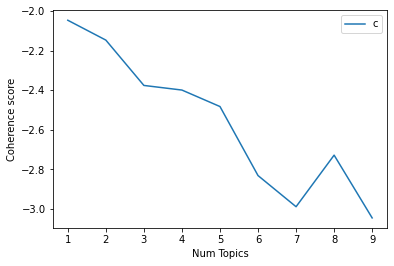

In [ ]:
import matplotlib.pyplot as plt

limit = 10
start = 1
step = 1
x = range(start, limit, step)
plt.plot(x, coherence)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()



In [ ]:
grouped = job_data.groupby(job_data['created_at'].dt.year)

# create a dictionary to store the new DataFrames
year_dfs = {}

# split the groups into separate DataFrames and store them in the dictionary
for year, group in grouped:
    year_dfs[year] = group.copy()

# analysis based on year
for year in year_dfs:
  